<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Heavenly巧克力公司想通过这些样本资料：  
1. 了解网上消费者是否浏览页面越多、花费时间越多，购买金额也越多。  
是的，浏览页面和浏览时间都和购买金额有较强的线性正相关关系，尤其是浏览页面数目。  
2. 除此之外，该公司还想了解周几、浏览器是否对销量也存在影响。  
存在影响，周一和周五销量最好。  
火狐浏览器和其他浏览器的人均消费金额和中位数都高，且火狐浏览器的使用人数也多。而IE使用人数多但人均消费金额低，中位数也低。

具体请见下面的代码运行结果和分析。

In [1]:
import pandas as pd
import xlrd
from pandas.plotting import scatter_matrix

pd.set_option('precision', 2) #设置精度
pd.set_option('display.float_format', lambda x: '%.2f' % x) #为了直观的显示数字，不采用科学计数法

In [2]:
# 读入数据
df = pd.read_excel("./data/HeavenlyChocolates.xlsx", dtype = {"Day":'category', 'Browser':'category', 'Customer':'category','Pages Viewed':'int'})

In [3]:
# 字符串形式的分类变量变为数字形式，并区分分类变量和数值变量
df.rename(columns = {'Pages Viewed':'PagesViewed', 'Time (min)':'Time', 'Amount Spent ($)':'AmountSpent'}, inplace = True)
df.Browser = pd.factorize(df.Browser)[0]
df.Browser = df.Browser.astype('category') # {0 for IE, 1 for Other, 2 for Firefox}
df.Day = df.Day.map({'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Customer       50 non-null category
Day            50 non-null category
Browser        50 non-null category
Time           50 non-null float64
PagesViewed    50 non-null int64
AmountSpent    50 non-null float64
dtypes: category(3), float64(2), int64(1)
memory usage: 2.3 KB


In [4]:
# 查看部分数据
df.head()

,Customer,Day,Browser,Time,PagesViewed,AmountSpent
0,1,1,0,12.00,4,54.52
1,2,3,1,19.50,6,94.90
2,3,1,0,8.50,4,26.68
3,4,2,2,11.40,2,44.73
4,5,3,0,11.30,4,66.27


In [5]:
# 数值变量的统计信息，包括总个数、平均值、标准差、最小值、3个四分位数、最大值
df[["Time","PagesViewed",'AmountSpent']].describe()

,Time,PagesViewed,AmountSpent
count,50.00,50.00,50.00
mean,12.81,4.82,68.13
std,6.06,2.04,32.34
min,4.30,2.00,17.84
25%,8.65,3.25,45.56
50%,11.40,4.50,62.15
75%,14.90,6.00,82.73
max,32.90,10.00,158.51


In [6]:
# 分类变量的统计信息，包括总个数、取值类数、众数、众数对应的出现次数
df[["Day","Browser"]].describe()

,Day,Browser
count,50,50
unique,7,3
top,5,0
freq,11,27


第一 ，对消费者在网站上花费的时间、浏览的页数进行数字和图形分析，并要计算出购买金额的均值。

In [7]:
# 查看网站花费时间、浏览页数的统计信息
df[["Time","PagesViewed"]].describe()

,Time,PagesViewed
count,50.00,50.00
mean,12.81,4.82
std,6.06,2.04
min,4.30,2.00
25%,8.65,3.25
50%,11.40,4.50
75%,14.90,6.00
max,32.90,10.00


In [8]:
# 平均每个网页的浏览时间的统计信息
(df["Time"]/df["PagesViewed"]).describe()

count   50.00
mean     2.91
std      1.23
min      0.72
25%      1.96
50%      2.84
75%      3.41
max      5.70
dtype: float64

In [9]:
# 购买金额的均值
df.AmountSpent.mean()

68.12819999999999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f99a90>,
      dtype=object)

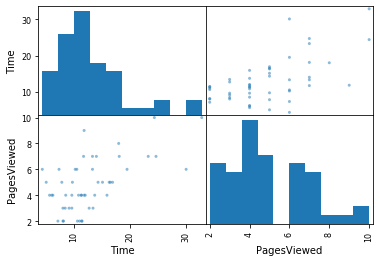

In [11]:
# 网站花费时间、浏览页数的散点图和各自的直方图
scatter_matrix(df[['Time','PagesViewed']])

In [12]:
# 查看按周几分类或者按浏览器分类的交易数目、总金额、均值，并绘制每个类别的箱线图，查看金额的分布
def cal_group(F):
    df.boxplot(column=['AmountSpent'],by=F,figsize=(6,5))
    print('每类的交易频数：')
    print(df.groupby(F)['Customer'].count().reset_index().sort_values(by = 'Customer', ascending=False))
    print('每类的交易总金额：')
    print(df.groupby(F)['AmountSpent'].sum().reset_index().sort_values(by = 'AmountSpent', ascending=False))
    print('每类的交易均值：')
    print(df.groupby(F)['AmountSpent'].mean().reset_index().sort_values(by = 'AmountSpent', ascending=False))

接下来分析分类变量。  

第二 ，计算每周中每天交易的频数、总金额以及均值，谈谈你的认识。

从下面的箱线图可以看出：
- 单笔交易金额最高的是在周一，最低是在周日。但周一的变异性最大，即发生在周一的单笔交易金额彼此差距很大，周日的变异性最小。
- 周一和周五单笔交易金额高，变异性也大；其他日子的单笔交易金额不如这两个日子高。

除了单笔交易金额，再从总量角度来看：  
- 交易数目和交易总金额都是周五和周一分别排第一、第二。结合周一和周五箱线图，我们能知晓，周五的金额更稳定的高，周一差异性太大了。
- 交易金额均值是周一排在了周五前，结合箱线图，我们也很容易发现周一的中位数绿线是排在了箱体中较高部分，说明大部分是箱体中金额高的，所以平均值较高。

每类的交易频数：
  Day  Customer
0   5        11
1   1         9
2   6         7
5   2         7
6   3         6
3   7         5
4   4         5
每类的交易总金额：
  Day  AmountSpent
0   5       945.43
1   1       813.38
5   2       414.86
2   6       378.74
6   3       341.82
4   4       294.03
3   7       218.15
每类的交易均值：
  Day  AmountSpent
1   1        90.38
0   5        85.95
5   2        59.27
4   4        58.81
6   3        56.97
2   6        54.11
3   7        43.63


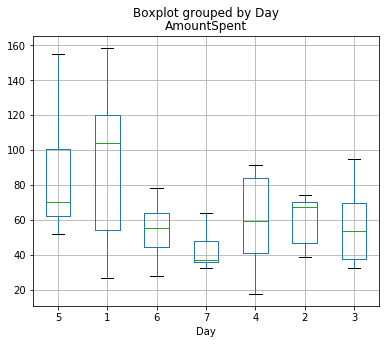

In [13]:
# 查看周几对交易的影响，计算每个周几的交易数目、总金额、均值，并绘制每个周几的箱线图，查看金额的分布
cal_group('Day')

第三，计算每种浏览器的频数、总金额以及均值，谈谈所得到的结论。

0表示IE，1表示其他，2表示火狐浏览器。  
从下面的箱线图可以看出：
- 单笔交易金额最低的是IE浏览器组，变异性也最大，即在IE浏览器进行的单笔交易金额彼此差距很大。
- 单笔交易金额最高的是其他浏览器，变异性也最小。
- 其他浏览器和火狐浏览器组存在单笔交易金额特别高的异常值，尤其是火狐浏览器组的高异常值很多。但除了异常值，单笔金额的差异性不大，尤其是其他浏览器组差异性最小。  
其他浏览器和火狐浏览器的平均值会受到异常值影响。

除了单笔交易金额，再从总量角度来看：  
- 交易数目和交易总金额都是IE和火狐分别排第一、第二，且与第三有较大差距。
- 交易金额均值是火狐浏览器和其他浏览器分别排第一、第二，且第一和第二接近，但都与第三差距较大。
- 总之，IE是使用人多，总额也多，但人均少；火狐使用人数较多，总额多，且人均也多；其他浏览器人数少，但人均多。

每类的交易频数：
  Browser  Customer
0       0        27
2       2        16
1       1         7
每类的交易总金额：
  Browser  AmountSpent
0       0      1656.81
2       2      1228.21
1       1       521.39
每类的交易均值：
  Browser  AmountSpent
2       2        76.76
1       1        74.48
0       0        61.36


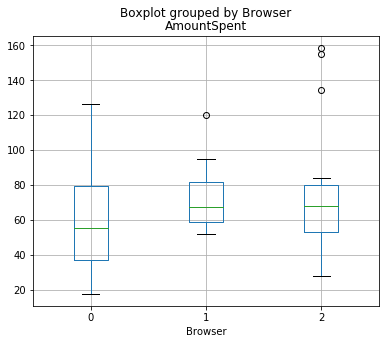

In [14]:
# 查看浏览器对交易的影响，计算每种浏览器的交易数目、总金额、均值，并绘制每组的箱线图，查看金额的分布
cal_group('Browser')

最后分析数值变量。  

第四，绘制浏览时间与消费金额散点图，计算样本相关系数，然后进行适当的讨论。  
第五，绘制浏览页数与消费金额散点图，计算样本相关系数，然后进行适当的讨论。  
第六，绘制浏览时间与浏览页数散点图，计算样本相关系数，然后进行适当的讨论。

本次数据中有三个数值变量：浏览时间、消费金额和浏览页数。  
分别绘制散点图和计算相关系数，查看两两之间的线性相关性，尤其是与消费金额的相关性。  

通过计算，我们知道了：  
1. 浏览页数与消费金额的相关系数是0.72，具有较强的线性正相关。  
2. 浏览时间与消费金额的相关系数是0.58，也具有一定的线性正相关关系，但不及页数。

In [15]:
# 计算三个数值变量的相关系数矩阵
df.corr()

,Time,PagesViewed,AmountSpent
Time,1.00,0.60,0.58
PagesViewed,0.60,1.00,0.72
AmountSpent,0.58,0.72,1.00


In [16]:
# 按照与花费金额的相关系数从高到低排序
df.corr()["AmountSpent"].sort_values(ascending=False)

AmountSpent   1.00
PagesViewed   0.72
Time          0.58
Name: AmountSpent, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1163081d0>,
      dtype=object)

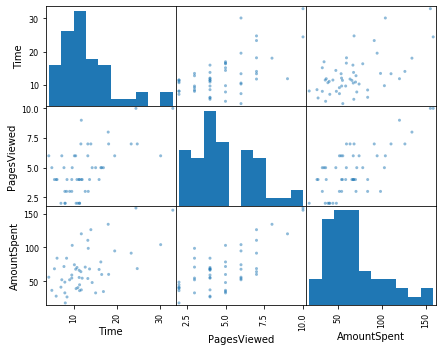

In [17]:
# 绘制三个数值变量的散点图和各自的直方图
scatter_matrix(df ,figsize=(7,5.5))

In [18]:
# 输出文件
df.to_csv("./result/HeavenlyChocolates.csv",float_format = '%.2f',index=False)